# Why do we have various clustering algorithms?

In the realm of data science and machine learning, selecting an appropriate clustering algorithm can be challenging due to the variety of options available. The **sklearn** library, for example, offers many distinct clustering classes, each designed for specific tasks such as co-clustering, bi-clustering, or clustering features instead of data points. The choice of algorithm largely depends on the nature of the data in hand. Algorithms specialized in text clustering are ideal for text data, while others are tailored for different types of data. Thus, a good understanding of the data's characteristics and the type of clustering required can help in narrowing down the most suitable algorithm.

However, when conducting exploratory data analysis (EDA), where the goal is to uncover underlying patterns without specific prior knowledge, choosing a specialized algorithm becomes less straightforward. Clustering, as an unsupervised machine learning task, involves identifying natural groupings within the data. Unlike supervised learning, which involves predictive modeling, clustering algorithms focus solely on the input data to find natural groups or clusters in the feature space. These clusters represent areas of density where data points are closer to each other than to those in other clusters. Each cluster may have a centroid and a boundary, providing insight into the data's structure.

Clustering is useful not only for understanding the problem domain (pattern discovery or knowledge discovery) but also for feature engineering, where data points can be labeled according to the identified clusters. Evaluating these clusters can be subjective and might require domain expertise, although there are quantitative measures specific to clustering that can assist in this evaluation.

Many clustering algorithms rely on similarity or distance measures between data points to identify dense regions. Therefore, scaling data before applying these algorithms is often beneficial. Some algorithms require the user to specify or estimate the number of clusters, while others need a minimum distance parameter to determine which points are considered close or connected.

Cluster analysis is iterative, with feedback from the evaluation of identified clusters guiding adjustments to the algorithm's configuration until the desired results are achieved. While the scikit-learn library offers a range of clustering algorithms, each presenting a unique approach to discovering natural groups in data, there is no universally best algorithm. The most suitable algorithm for your data can only be determined through controlled experiments and thorough analysis.

# 0. LIBRARIES IMPORT

In [ ]:
!pip install hdbscan

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
import hdbscan
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import time

In [3]:
%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.4, 's' : 50, 'linewidths':1}

# 1. DATA

Next, we need to prepare some data. To make the experiment more engaging, an artificial dataset was created, designed to challenge clustering algorithms. This dataset includes non-globular clusters and some noise, mimicking the complexities often found in real-world data. For the purpose of visualization, the dataset is two-dimensional, allowing us to see the cluster formations. This simplification aids in visualization, though real-world data typically involves higher dimensions where such straightforward visualization isn't feasible.

In [4]:
data = np.load('clustering_data.npy')

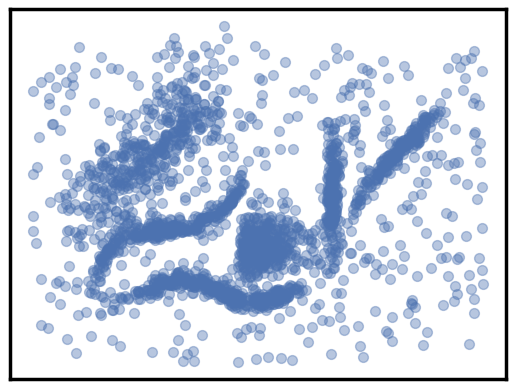

In [5]:
plt.scatter(data.T[0], data.T[1], c='b', **plot_kwds)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)

2. # CLUSTERING ALGORITHMS

We start by defining an utility function that returns the clustering result as a plot:

In [6]:
def plot_clusters(data, algorithm, args, kwds):
    start_time = time.time()
    labels = algorithm(*args, **kwds).fit_predict(data)
    end_time = time.time()

    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)

    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

    plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24, pad=20)
    plt.text(0.135, 0.87, 'Clustering took {:.2f} s'.format(end_time - start_time),
             fontsize=10, transform=plt.gcf().transFigure, verticalalignment='top')


## a. K-Means

K-Means is a popular clustering algorithm known for its speed, simplicity, and widespread availability in statistical and machine learning tools. It partitions a dataset into K clusters by minimizing intra-cluster distances, assuming clusters are spherical. This method is efficient and can handle large datasets effectively. However, K-Means has notable drawbacks. It requires the user to specify the number of clusters in advance, which can be challenging without prior knowledge. The algorithm's results can vary due to different initializations, affecting stability and reliability. Additionally, K-Means forces every point into a cluster, potentially misplacing data points, and is less effective for non-globular cluster shapes. Despite these issues, its performance makes K-Means a preferred choice for many applications.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


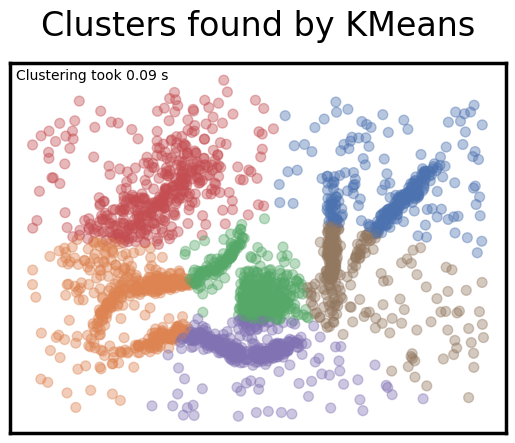

In [7]:
plot_clusters(data, cluster.KMeans, (), {'n_clusters':6})

We observe some notable results. First, the assumption of perfectly globular clusters causes natural clusters to be split and reshaped into more globular forms. Additionally, noise points are incorrectly assigned to clusters. In some instances, points far from any cluster center are included in clusters due to their relative positions. This contamination of clusters by noise is particularly problematic in exploratory data analysis (EDA) as it can distort your intuition and understanding of the data. On the positive side, the clustering process was very fast, allowing us to quickly obtain results, even if they are not entirely accurate.

## b. MiniBatch K-Means

MiniBatch KMeans is a variant of the KMeans clustering algorithm designed to handle large datasets efficiently. Instead of using the entire dataset, it processes small, random subsets (minibatches) to update the cluster centroids, significantly reducing computation time while still providing results similar to the standard KMeans.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


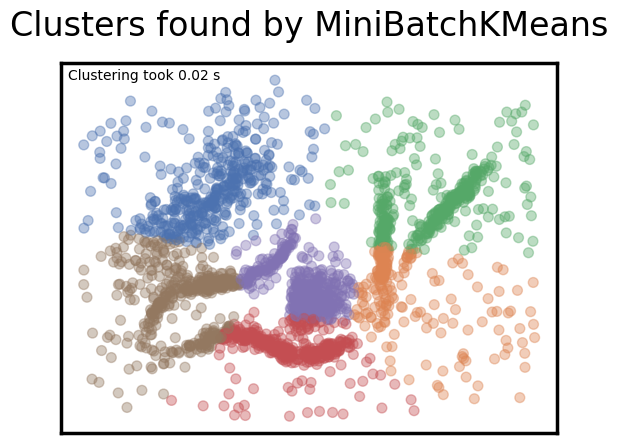

In [8]:
plot_clusters(data, cluster.MiniBatchKMeans, (), {'n_clusters':6})

## c. Affinity Propagation

Affinity Propagation is a clustering algorithm that employs a graph-based approach where points "vote" on their preferred "exemplar." This results in a set of cluster exemplars, and each point is assigned to the nearest exemplar's cluster, similar to K-Means. One significant advantage of Affinity Propagation is that it does not require the user to specify the number of clusters, as the graph-based voting inherently determines the cluster count. Additionally, it supports non-metric dissimilarities, accommodating data that doesn't fit into a traditional metric space and allowing for non-symmetric dissimilarities. The algorithm also exhibits better stability across runs compared to K-Means.

However, Affinity Propagation shares some weaknesses with K-Means, such as forcing points into clusters regardless of fit and assuming globular clusters. It introduces the challenge of tuning the "preference" and "damping" parameters, which can be difficult to select appropriately, often leading to a large number of clusters if not chosen carefully. Despite its deterministic nature over multiple runs, Affinity Propagation is computationally expensive and slow, making it impractical for large datasets without significant optimization.

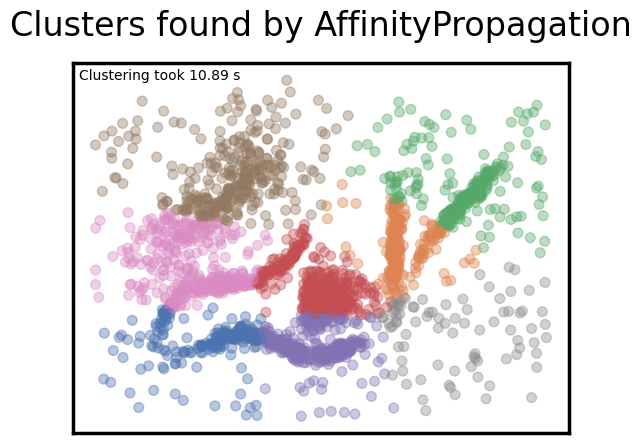

In [9]:
plot_clusters(data, cluster.AffinityPropagation, (), {'preference':-5.0, 'damping':0.95})

The outcome closely resembles K-Means and inherits its associated issues. The spherical clusters have merged and fragmented parts of different 'natural' clusters, while noise points have been grouped into clusters without consideration for being significant outliers. Essentially, these 'clusters' provide a very limited and misleading understanding of our data. Furthermore, it took us several seconds to reach this uninformative result, which is disappointing.

## d. Mean Shift

Mean Shift is a centroid-based clustering algorithm that doesn't require specifying the number of clusters in advance. It aims to find clusters by locating maxima of a probability density function estimated from the data using kernel density estimation techniques. The key parameter is the bandwidth of the kernel, which determines the smoothness of the density estimate.

One advantage of Mean Shift is its intuitive parameterization, making it easier to select the bandwidth compared to specifying the number of clusters. However, its performance can be slow, especially in the sklearn implementation, despite good scalability in theory.

Mean Shift doesn't assign every point to a cluster but still tends to aim for globular clusters, which can lead to less than ideal results. Its results can vary significantly with different bandwidth parameters, and stability under different runs may vary due to random initialization.

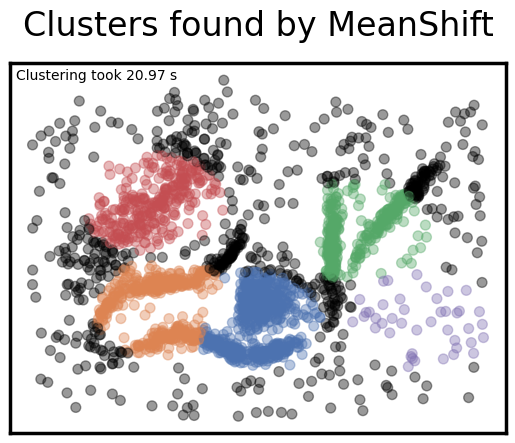

In [10]:
plot_clusters(data, cluster.MeanShift, (), {'bandwidth': 0.175, 'cluster_all': False})

We're reducing the noise in our clusters, but we still have dense regions labeled as noise and clusters that intersect and divide what appear to be natural clusters. Additionally, there's an outlier grey cluster group that seems out of place. While Mean Shift shows promise and is an improvement over K-Means, it still falls short of our expectations. Furthermore, it took over 15 seconds to cluster this small dataset, which is disappointing.

## e. Spectral Clustering


Spectral clustering is a graph-based clustering technique that constructs a graph from the data points' distances, often using a k-nearest neighbors graph or a dense graph. It then utilizes the eigenvectors of the Laplacian matrix of the graph to find a low-dimensional embedding of the data into Euclidean space, essentially performing manifold learning. By transforming the space, spectral clustering aims to better represent the underlying structure of the data. The transformed space is then clustered using a standard clustering algorithm, typically K-Means.

Advantages of spectral clustering include a departure from the assumption of purely globular clusters, potentially resulting in more accurate clustering. However, it retains some weaknesses of K-Means, such as partitioning the data instead of true clustering and the need to specify the number of clusters. While it offers slightly more stability than K-Means due to the transformation, it still suffers from stability issues. Performance can be slower, especially for spatial data, as it often requires working with dense graphs.

In summary, spectral clustering provides a more flexible approach than K-Means but still faces challenges such as noise pollution, the need for specifying the number of clusters, stability issues, and potentially slower performance, especially for spatial data.

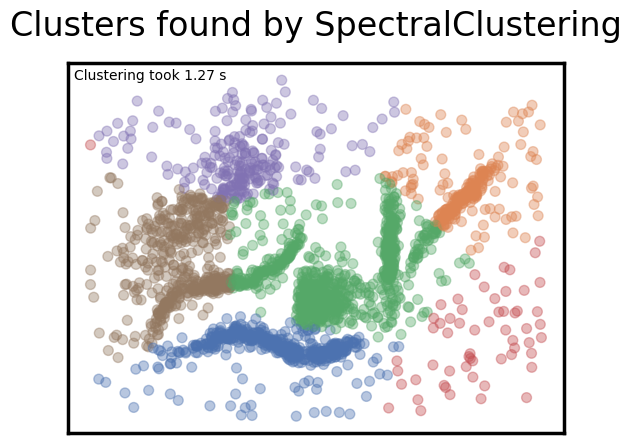

In [11]:
plot_clusters(data, cluster.SpectralClustering, (), {'n_clusters':6})

Spectral clustering showed improvement in capturing the long thin clusters, although it still oddly split some of them and merged parts with other clusters. The presence of noise points continues to disrupt our clusters, leading to misleading interpretations. However, there was a noticeable performance improvement compared to Affinity Propagation. Overall, we're making progress, but we're still far from meeting our goals.

## f. Agglomerative Clustering

Agglomerative clustering encompasses a range of algorithms that start with each point in its own cluster and iteratively merge clusters based on certain criteria until only one cluster remains, forming a hierarchy or binary tree of clusters. Different variations of agglomerative clustering use criteria like single linkage, mean distance, or distance between cluster centroids to decide which clusters to merge. Once a cluster hierarchy is formed, clusters can be obtained by choosing a cut level. While this method allows clusters to grow following the underlying data manifold and provides insights through dendrogram inspection, determining the appropriate cut level for flat clusters can be challenging. Agglomerative clustering still assumes noise-free clusters and requires specifying the number of clusters, which may not be intuitive in exploratory data analysis (EDA). However, it offers stability across runs and can provide good performance with the right implementation.

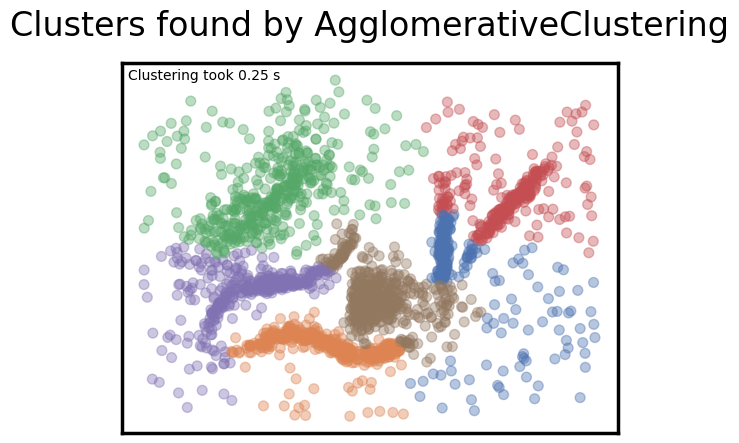

In [12]:
plot_clusters(data, cluster.AgglomerativeClustering, (), {'n_clusters':6, 'linkage':'ward'})

Like spectral clustering, we've effectively managed the long thin clusters better than K-Means or Affinity Propagation. In fact, we've slightly enhanced upon spectral clustering in this aspect. While we still observe clusters containing parts of multiple natural clusters, these mis-clusterings are smaller. However, noise points continue to disrupt our clusters. Overall, this clustering result is likely the best we've seen so far, but due to mis-clustering and noise issues, our intuition about the data may still fall short of our expectations.

## g. BIRCH

BIRCH (Balanced Iterative Reducing and Clustering using Hierarchies) is a hierarchical clustering algorithm designed for large datasets. It builds a tree structure incrementally by clustering data points into subclusters and merging them hierarchically. BIRCH is efficient in memory usage and can handle streaming data by dynamically updating the cluster structure.

One advantage of BIRCH is its ability to efficiently cluster large datasets while maintaining low memory requirements. It's particularly suitable for data with a large number of dimensions. Additionally, BIRCH can handle noisy data and outliers gracefully.

However, BIRCH may struggle with clusters of varying sizes and densities. It also requires tuning parameters like the maximum number of subclusters and the threshold for merging, which can be challenging. Despite its efficiency, BIRCH might not perform optimally for all types of datasets, especially those with complex cluster shapes.

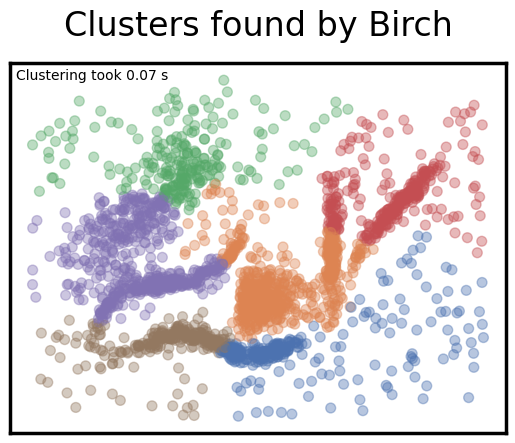

In [13]:
plot_clusters(data, cluster.Birch, (), {'threshold':0.025, 'n_clusters':6})

## h. DBSCAN

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a density-based algorithm that identifies clusters based on dense regions in the data. Unlike partitioning algorithms, DBSCAN extracts dense clusters and designates sparse regions as noise. It transforms the space according to data density, leaving points in dense regions unchanged while moving points in sparse regions further away. By applying single linkage clustering to the transformed space and cutting a dendrogram based on a distance parameter (epsilon), clusters are obtained. Singleton clusters at this cutoff are considered noise.

One advantage of DBSCAN is its ability to capture non-globular clusters and avoid noise contamination. However, choosing the epsilon parameter can be challenging and sensitive, as it defines the neighborhood density. Additionally, the combination of epsilon and min_samples parameter determines the density of clusters, which may lead to issues with variable density clusters.

DBSCAN offers stability across runs but may lack stability over varying epsilon and min_samples. Its significant strength lies in performance, as it can efficiently handle large datasets, making it suitable for scaling to sizes often impractical for other algorithms.

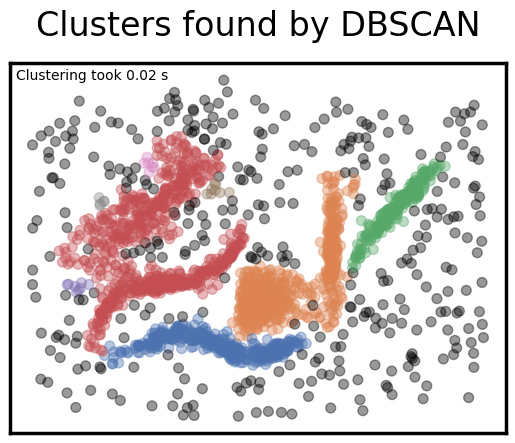

In [14]:
plot_clusters(data, cluster.DBSCAN, (), {'eps':0.025})


The result is quite satisfactory; although we merged some natural clusters a few times, we didn't split them apart to achieve this. We also identified some small clusters within the large sparse cluster. These issues stem from not effectively handling variable density clusters—while trying to cluster the sparser regions, some denser clusters end up being merged with them, and meanwhile, the very sparse cluster remains divided into several clusters. Overall, we're finally making progress, but there's still ample room for improvement.

## i. HDBSCAN

HDBSCAN (Hierarchical Density-Based Spatial Clustering of Applications with Noise) is a clustering algorithm developed to address varying density clusters, created by the same researchers who introduced DBSCAN. Similar to DBSCAN, HDBSCAN transforms the space based on density and performs single linkage clustering. However, instead of using an epsilon value to cut the dendrogram, HDBSCAN condenses the dendrogram by identifying splits that result in points "falling out of a cluster". This allows for the selection of stable or persistent clusters at varying heights, enabling the detection of varying density clusters without the need for an epsilon parameter.

One advantage of HDBSCAN is its ability to handle varying density clusters effectively, addressing a limitation of DBSCAN. It inherits the benefits of DBSCAN in terms of robustness to noise and outliers, making it highly reliable. HDBSCAN also offers intuitive parameter choices, particularly the minimum cluster size, which is more straightforward for exploratory data analysis (EDA).

However, HDBSCAN still inherits the somewhat unintuitive min_samples parameter from DBSCAN. While it's less sensitive in HDBSCAN, it remains a weakness. Despite this, HDBSCAN is stable across runs and parameter choices and can be very efficient when implemented well, showing similar performance to fastcluster's agglomerative clustering.

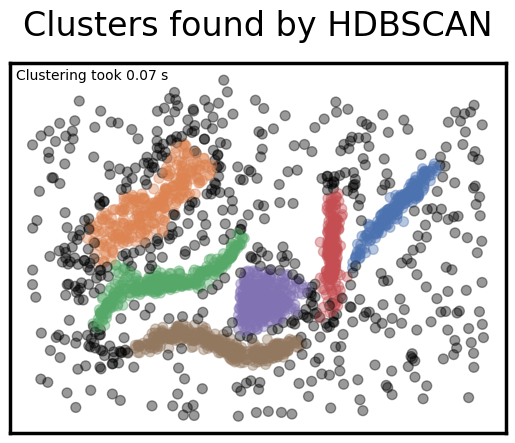

In [15]:
plot_clusters(data, hdbscan.HDBSCAN, (), {'min_cluster_size':15})

# CONCLUSION

## a. plots

In [17]:
def final_plot(ax, data, algorithm, args, kwds):
    start_time = time.time()
    labels = algorithm(*args, **kwds).fit_predict(data)
    end_time = time.time()

    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    ax.scatter(data.T[0], data.T[1], c=colors)

    ax.set_title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=10)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


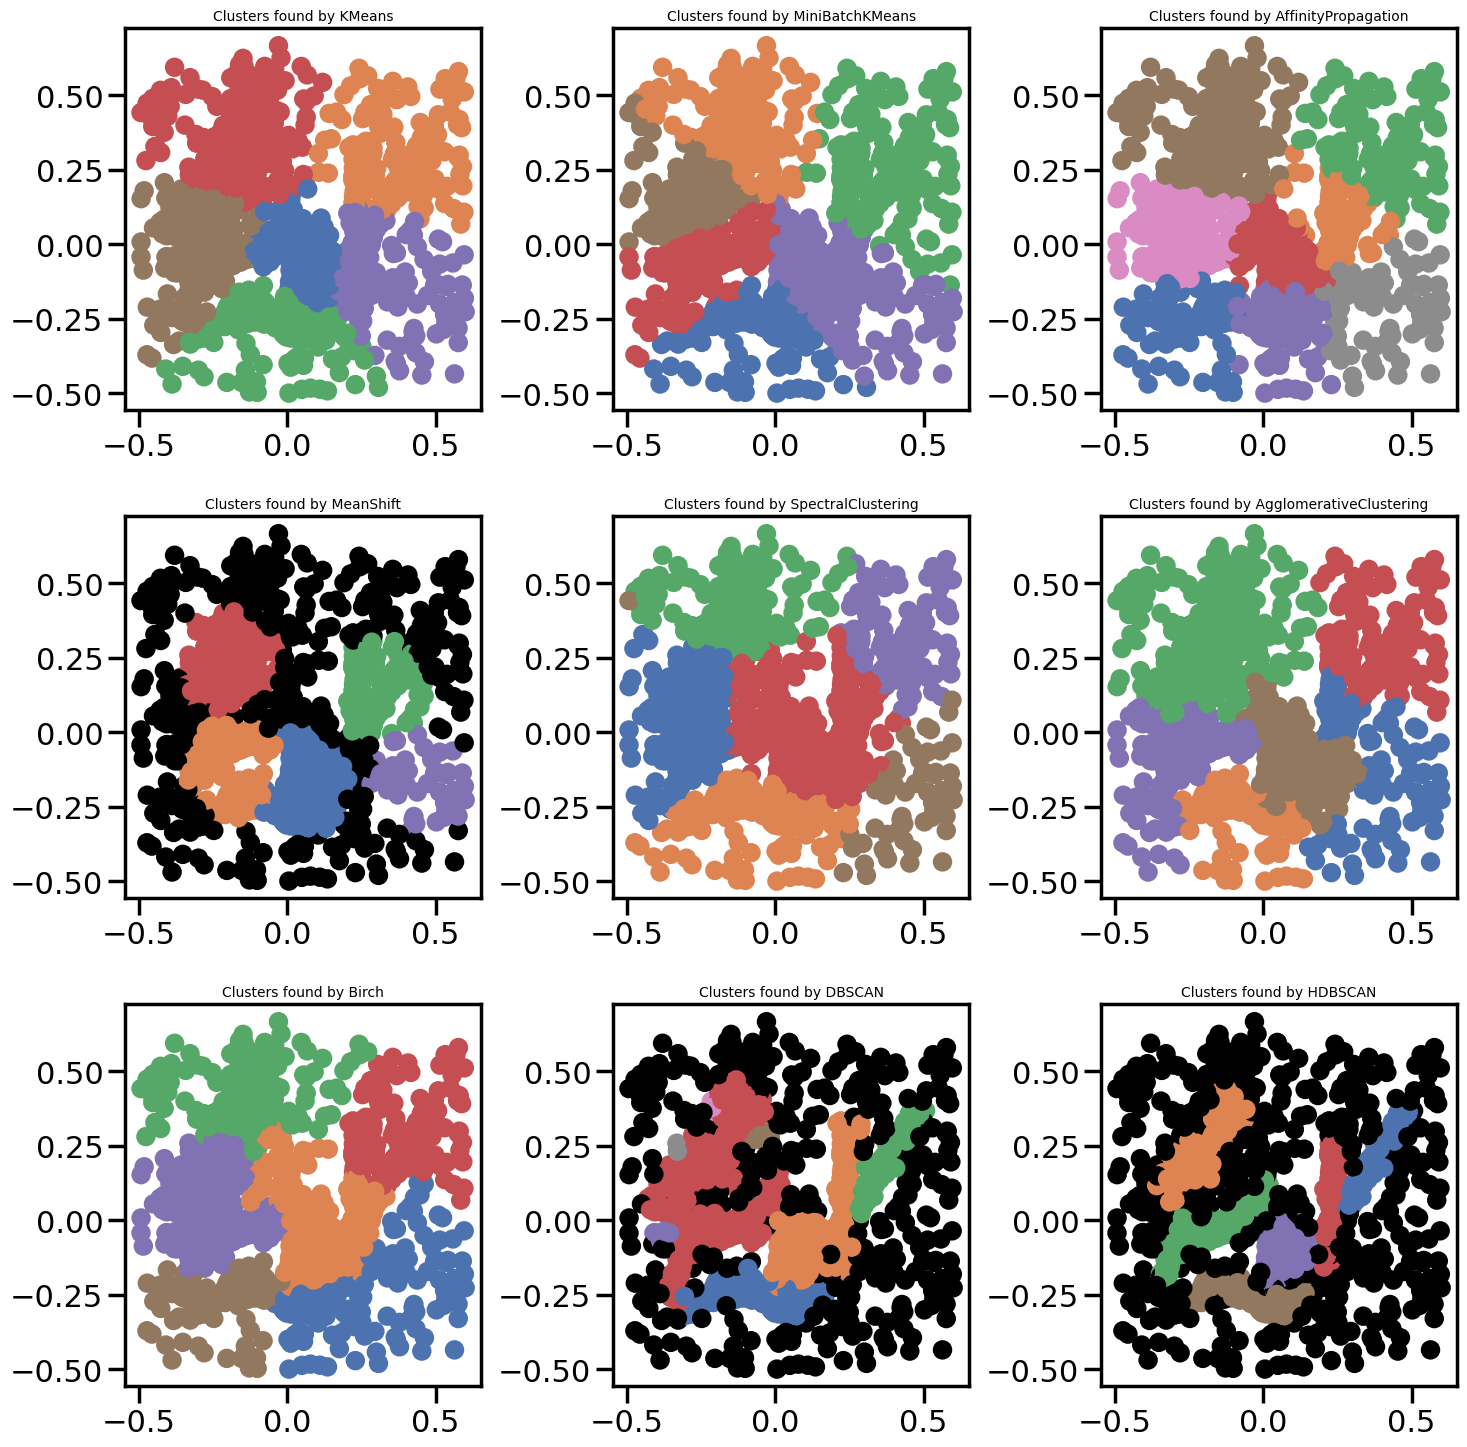

In [18]:
# Create subplots
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

# Call each function and plot on separate subplots
final_plot(axs[0, 0], data, cluster.KMeans, (), {'n_clusters': 6})
final_plot(axs[0, 1], data, cluster.MiniBatchKMeans, (), {'n_clusters': 6})
final_plot(axs[0, 2], data, cluster.AffinityPropagation, (), {'preference': -5.0, 'damping': 0.95})
final_plot(axs[1, 0], data, cluster.MeanShift, (), {'bandwidth': 0.175, 'cluster_all': False})
final_plot(axs[1, 1], data, cluster.SpectralClustering, (), {'n_clusters': 6})
final_plot(axs[1, 2], data, cluster.AgglomerativeClustering, (), {'n_clusters': 6, 'linkage': 'ward'})
final_plot(axs[2, 0], data, cluster.Birch, (), {'threshold': 0.025, 'n_clusters': 6})
final_plot(axs[2, 1], data, cluster.DBSCAN, (), {'eps': 0.025})
final_plot(axs[2, 2], data, hdbscan.HDBSCAN, (), {'min_cluster_size': 15})

plt.tight_layout()
plt.show()

## b. metrics

In this section, we will use three internal evaluation metrics to assess the quality of the clusters produced by different clustering algorithms. These metrics are:



1.   The **Silhouette Score** measures how similar an object is to its own cluster compared to other clusters
2.   The **Davies-Bouldin Index** is defined as the average similarity ratio of each cluster with its most similar cluster. The score is calculated based on the ratio of within-cluster distances to between-cluster distances. A higher Davies-Bouldin Index indicates better clustering.
3.   The **Calinski-Harabasz Index** (also known as the Variance Ratio Criterion) evaluates the ratio of the sum of between-cluster dispersion and within-cluster dispersion for all clusters. A lower Calinski-Harabasz Index indicates better-defined clusters, meaning that clusters are dense and well separated.



In [20]:

def compute_internal_metrics(data, labels):
    metrics = {
        'Silhouette Score': silhouette_score(data, labels),
        'Davies-Bouldin Index': davies_bouldin_score(data, labels),
        'Calinski-Harabasz Index': calinski_harabasz_score(data, labels)
    }
    return metrics


In [21]:

results = {}
algorithms = [
    ('KMeans', cluster.KMeans, {'n_clusters': 6}),
    ('MiniBatchKMeans', cluster.MiniBatchKMeans, {'n_clusters': 6}),
    ('AffinityPropagation', cluster.AffinityPropagation, {'preference': -5.0, 'damping': 0.95}),
    ('MeanShift', cluster.MeanShift, {'bandwidth': 0.175, 'cluster_all': False}),
    ('SpectralClustering', cluster.SpectralClustering, {'n_clusters': 6}),
    ('AgglomerativeClustering', cluster.AgglomerativeClustering, {'n_clusters': 6, 'linkage': 'ward'}),
    ('Birch', cluster.Birch, {'threshold': 0.025, 'n_clusters': 6}),
    ('DBSCAN', cluster.DBSCAN, {'eps': 0.025}),
    ('HDBSCAN', hdbscan.HDBSCAN, {'min_cluster_size': 15})
]
for name, algorithm, params in algorithms:
    model = algorithm(**params)
    labels = model.fit_predict(data)
    results[name] = compute_internal_metrics(data, labels)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [22]:
results_df = pd.DataFrame(results).T
display(results_df)


,Silhouette Score,Davies-Bouldin Index,Calinski-Harabasz Index
KMeans,0.407227,0.812463,2153.796878
MiniBatchKMeans,0.385281,0.882874,2082.392520
AffinityPropagation,0.407249,0.777836,2190.946300
MeanShift,0.259271,1.597887,468.146986
SpectralClustering,0.356652,0.789105,1559.419143
AgglomerativeClustering,0.381890,0.926706,1908.471649
Birch,0.356024,0.909327,1723.500581
DBSCAN,0.014537,2.106891,281.577317
HDBSCAN,0.213112,2.015223,390.943927
